In [5]:
#Set working directory
import os
path="/Users/sarakohnke/Desktop/data_type_you/processed-final/"
os.chdir(path)
os.getcwd()

'/Users/sarakohnke/Desktop/data_type_you/processed-final'

In [6]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#Import cleaned dataframe
dataframe=pd.read_csv('dataframe240620.csv',index_col=0)
dataframe.shape

(33470, 45)

In [4]:
#dataframe=pd.read_csv('dataframe240620.csv',index_col=0)
#from pycaret.classification import *
#exp1=setup(dataframe, target='A1C (%)')

In [ ]:
#compare_models()

In [9]:
from sklearn.tree import DecisionTreeRegressor
from pprint import pprint
from sklearn.model_selection import train_test_split

X_rf = dataframe.drop(['A1C (%)'],1)
y_rf = dataframe['A1C (%)']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, random_state = 0)

clf_rf = DecisionTreeRegressor(random_state = 0).fit(X_train_rf, y_train_rf)
print('Parameters currently in use:\n')
pprint(clf_rf.get_params())

X_train_rf.to_csv('X_train.csv')
y_train_rf.to_csv('y_train.csv')

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


In [10]:
from sklearn.model_selection import RandomizedSearchCV


# Number of features to consider at every split - for regressor, none is good
max_features = None

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = True

# Create the random grid
random_grid = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               
               }
pprint(random_grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_rf = DecisionTreeRegressor(random_state=0)

# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter=50,cv = 3, verbose=2, random_state=0, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_rf, y_train_rf)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   24.8s finished


{'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}

In [13]:
# Make features and target objects
X_rf2 = dataframe.drop(['A1C (%)'],1)
y_rf2 = dataframe['A1C (%)']
X_train_rf2, X_test_rf2, y_train_rf2, y_test_rf2 = train_test_split(X_rf2, y_rf2, random_state = 0)

# Train model
clf_rf2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=4,
                min_samples_split=10,random_state = 0).fit(X_train_rf2, y_train_rf2)

In [14]:
# Print r2 score
print('R-squared score (training): {:.3f}'
     .format(clf_rf2.score(X_train_rf2, y_train_rf2)))
print('R-squared score (test): {:.3f}'
     .format(clf_rf2.score(X_test_rf2, y_test_rf2)))

R-squared score (training): 0.654
R-squared score (test): 0.313


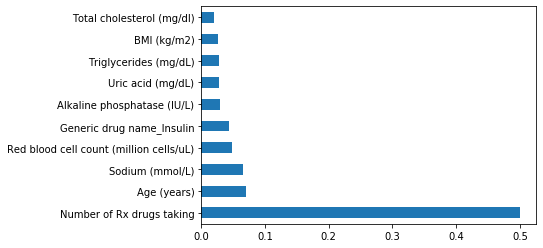

In [15]:
#Find feature importances in model
import pandas as pd
feat_importances = pd.Series(clf_rf2.feature_importances_, index=X_rf2.columns)
feat_importances.to_csv('feat_importances.csv')
feat_importances.nlargest(10).plot(kind='barh')
#plt.savefig('importance.png',dpi=300)

In [237]:
X_test_rf2.head()
X_test_rf2.to_csv('xtestjun22.csv')

In [32]:
y_test_rf2.head()
y_test_rf2.to_csv('ytestjun22.csv')

In [31]:
#Make patient lists from test data for app
patient1_list=X_test_rf2.iloc[115,:].values.tolist()
patient2_list=X_test_rf2.iloc[253,:].values.tolist()
patient3_list=X_test_rf2.iloc[603,:].values.tolist()

In [19]:
#Find current predicted A1C score
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your current score: '+str(A1C_prediction_drug1_2[0]))

your current score: 9.419999999999998


In [18]:
#insulin - 1-3?->just1
patient1_list[6]=1
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with insulin: '+str(A1C_prediction_drug1_2[0]))

your predicted score with insulin: 9.419999999999998


In [21]:
#bmi    
patient1_list[18]=24
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with ideal bmi: '+str(A1C_prediction_drug1_2[0]))

your predicted score with ideal bmi: 6.659999999999999


In [23]:
#bp     
patient1_list[3]=120
patient1_list[4]=80
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with ideal blood pressure: '+str(A1C_prediction_drug1_2[0]))

your predicted score with ideal blood pressure: 9.419999999999998


In [25]:
#triglycerides
patient1_list[32]=150
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with ideal triglycerides: '+str(A1C_prediction_drug1_2[0]))

your predicted score with ideal triglycerides: 9.419999999999998


In [27]:
#healthy diet
patient1_list[43]=1
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with healthy diet: '+str(A1C_prediction_drug1_2[0]))

your predicted score with healthy diet: 9.419999999999998


In [29]:
#cholesterol 
patient1_list[19]=170
A1C_prediction_drug1_2 = clf_rf2.predict([patient1_list])
print('your predicted score with cholesterol: '+str(A1C_prediction_drug1_2[0]))

your predicted score with cholesterol: 9.419999999999998


 do the same for other patients

test my model against dummy regressor

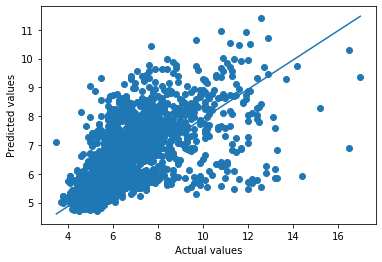

In [196]:
import numpy as np
import matplotlib.pyplot as plt
predicted_rf2 = clf_rf2.predict(X_test_rf2)


plt.scatter(y_test_rf2,predicted_rf2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test_rf2), np.poly1d(np.polyfit(y_test_rf2, predicted_rf2, 1))(np.unique(y_test_rf2)))

#plt.savefig('r2.png',dpi=300)


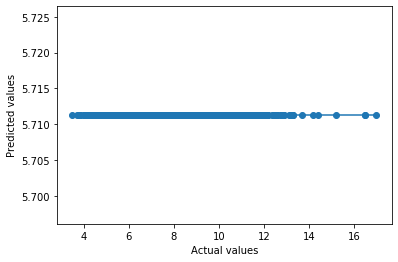

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
dummy_mean=DummyRegressor(strategy='mean')
predicted_rf2 = clf_rf2.predict(X_test_rf2)
predicted_dummy=dummy_mean.predict(X_test_rf2)

plt.scatter(y_test_rf2,predicted_dummy)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(y_test_rf2), np.poly1d(np.polyfit(y_test_rf2, predicted_dummy, 1))(np.unique(y_test_rf2)))

plt.show()

In [238]:
#pickle the model so can upload trained model to app
import pickle
#import bz2
#import _pickle as cPickle
with open('model_pkl.pickle','wb') as output_file:
    pickle.dump(clf_rf2,output_file)
    
# Pickle a file and then compress it into a file with extension 
#def compressed_pickle(model, clf_rf2):
#    with bz2.BZ2File(model + '.bz2', 'w') as f: 
#        cPickle.dump(clf_rf2, f)
 
##file=bz2.BZ2File('c.pkl','w')
#pickle.dump(clf_rf2,sfile)
#compressed_pickle('model',clf_rf2)

In [15]:
# to open compressed pickle
#def decompress_pickle(file):
#    model=bz2.BZ2File(file,'rb')
#    model=cPickle.load(model)
#    return model

#model=decompress_pickle('model.pbz2')

In [5]:
#to open normal pickle
with open('model_pkl.pickle','rb') as input_file:
    model=pickle.load(input_file)